<a href="https://colab.research.google.com/github/luceldasilva/machine-learning-con-scikit-learn/blob/main/Machine_Learning_con_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hoja de Trabajo del [Curso Profesional de Machine Learning con Scikit-Learn](https://platzi.com/cursos/scikitlearn/)

## Importando los materiales necesarios

In [1]:
# Clase 6 Instalación de librerías en Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# import scipy 
# import joblib 
# import scikit-learn

In [3]:
url_heart = 'https://static.platzi.com/media/public/uploads/heart_bde64b4c-2d72-4cd3-a964-62ee94855f5b.csv'
url_candy = 'https://static.platzi.com/media/public/uploads/candy_a74a49fd-6364-4c16-9381-406cdb66f338.csv'
url_happy = 'https://static.platzi.com/media/public/uploads/felicidad_b0b50c6d-41dd-4ea8-a4f0-92a8068d4d3e.csv'

In [4]:
df_heart = pd.read_csv(url_heart)
df_candy = pd.read_csv(url_candy)
df_happy = pd.read_csv(url_happy)

## Optimización de features
---

### PCA
#### Clases para repasar conceptos
*   [Intro de PCA en scikit-learn](https://platzi.com/clases/1796-scikitlearn/25647-introduccion-al-pca/)
*   [PCA en Álgebra Lineal](https://platzi.com/clases/1728-algebra-ml/23907-que-es-pca/)



In [5]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# es regresión logística pero sirve para clasificación Kappa
from sklearn.linear_model import LogisticRegression

In [6]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
dt_features_kokkoro = df_heart.drop(['target'], axis=1)
dt_target_kokkoro = df_heart['target']
dt_features_kokkoro = StandardScaler().fit_transform(dt_features_kokkoro)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dt_features_kokkoro, dt_target_kokkoro, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(717, 13)

In [10]:
y_train.shape

(717,)

In [11]:
X_train.shape[0]==y_train.shape[0]

True

Se puede seguir ✅

![](https://cdn.myanimelist.net/images/characters/15/406679.jpg)

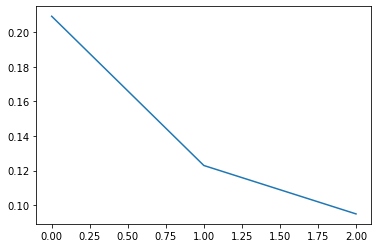

In [12]:
# Implementar el algoritmo
# si no le especificamos componentes dará el mínimo por predeterminado :v
pca_kokkoro = PCA(n_components=3)
pca_kokkoro.fit(X_train)

ipca_kokkoro = IncrementalPCA(n_components=3, batch_size=10)
ipca_kokkoro.fit(X_train)

plt.plot(range(len(pca_kokkoro.explained_variance_)), pca_kokkoro.explained_variance_ratio_)
plt.show()

In [13]:
logistic_kokkoro = LogisticRegression(solver='lbfgs')

dt_train_kokkoro = pca_kokkoro.transform(X_train)
dt_test_kokkoro = pca_kokkoro.transform(X_test)
logistic_kokkoro.fit(dt_train_kokkoro,y_train)
print("SCORE PCA: ", logistic_kokkoro.score(dt_test_kokkoro, y_test))

SCORE PCA:  0.7857142857142857


In [14]:
dt_train_summer_kokkoro = ipca_kokkoro.transform(X_train)
dt_test_summer_kokkoro = ipca_kokkoro.transform(X_test)
logistic_kokkoro.fit(dt_train_summer_kokkoro,y_train)
print("SCORE IPCA: ", logistic_kokkoro.score(dt_test_summer_kokkoro, y_test))

SCORE IPCA:  0.8051948051948052


### Kernels y KPCA

In [15]:
from sklearn.decomposition import KernelPCA

In [16]:
kpca_kokkoro = KernelPCA(n_components=4, kernel='poly')
kpca_kokkoro.fit(X_train)

dt_train_princess_kokkoro = kpca_kokkoro.transform(X_train)
dt_test_princess_kokkoro = kpca_kokkoro.transform(X_test)

logistic_kokkoro.fit(dt_train_princess_kokkoro,y_train)
print("SCORE KPCA: ", logistic_kokkoro.score(dt_test_princess_kokkoro, y_test))

SCORE KPCA:  0.7987012987012987


### [Regulación con Lasso, Ridge](https://platzi.com/clases/1796-scikitlearn/25651-que-es-la-regularizacion-y-como-aplicarla/) [y ElasticNet](https://platzi.com/clases/1796-scikitlearn/25654-elasticnet-una-tecnica-intermedia/)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

![](https://static.wikia.nocookie.net/edens-zero/images/2/22/Happy_Anime.png/revision/latest?cb=20210420211115&path-prefix=es)

In [18]:
df_happy.describe()

,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [19]:
  X_happy = df_happy[['gdp', 'family', 'lifexp', 'freedom' , 'corruption' , 'generosity', 'dystopia']]
  y_happy = df_happy[['score']]

In [20]:
X_happy.shape[0]==y_happy.shape[0]

True

In [21]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_happy, y_happy, test_size=0.25)

In [22]:
modelLinear_h = LinearRegression().fit(X_train_h, y_train_h)
y_predict_linear = modelLinear_h.predict(X_test_h)
modelLasso = Lasso(alpha=0.02).fit(X_train_h, y_train_h) #alpha predeterminado es 1
y_predict_lasso = modelLasso.predict(X_test_h)
modelRidge = Ridge(alpha=1).fit(X_train_h, y_train_h)
y_predict_Ridge =  modelRidge.predict(X_test_h)
modelRegr = ElasticNet(random_state=0).fit(X_train_h, y_train_h)
y_predict_Regr = modelRegr.predict(X_test_h)

In [23]:
linear_loss = mean_squared_error(y_test_h, y_predict_linear)
print("Linear Loss:", linear_loss)

lasso_loss = mean_squared_error(y_test_h, y_predict_lasso)
print("Lasso Loss: ", lasso_loss)

ridge_loss = mean_squared_error(y_test_h, y_predict_Ridge)
print("Ridge Loss: ", ridge_loss)

regr_loss = mean_squared_error(y_test_h, y_predict_Regr)
print("ElasticNet Loss: ", regr_loss)

Linear Loss: 7.515149499000008e-08
Lasso Loss:  0.04699277126792984
Ridge Loss:  0.005672129857556434
ElasticNet Loss:  1.4315566999593028


In [24]:
print("="*32)
print("Coef LASSO")
print(modelLasso.coef_)
print("="*32)
print("Coef RIDGE")
print(modelRidge.coef_)
print("="*32)
print("Coef ElasticNet")
print(modelRegr.coef_)

Coef LASSO
[1.32081569 0.90385619 0.41357983 0.70219182 0.         0.28292156
 0.9327326 ]
Coef RIDGE
[[1.07688049 0.96259918 0.84827066 0.87630792 0.64301318 0.76772427
  0.97242213]]
Coef ElasticNet
[0. 0. 0. 0. 0. 0. 0.]


## Regresiones robustas
---

### Valores atípicos
Usando el dataset de happy corrupto 🤬

In [25]:
from sklearn.linear_model import (
    RANSACRegressor, HuberRegressor
)
from sklearn.svm import SVR

In [26]:
url_corrupt = 'https://static.platzi.com/media/tmp/class-files/git/profesional_scikitlearn_platzi/profesional_scikitlearn_platzi-preparacion_regresion_robusta/data/felicidad_corrupt.csv'
df_corrupt = pd.read_csv(url_corrupt)
df_corrupt.tail()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
162,H,163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,I,164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,J,165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,K,166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,L,167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X_corrupt = df_corrupt.drop(['country', 'score'], axis=1)
y_corrupt = df_corrupt[['score']]

In [28]:
X_corrupt.shape[0]==y_corrupt.shape[0]

True

In [29]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_corrupt, y_corrupt, test_size=0.3, random_state=42)

In [30]:
# Manera pro
estimadores = {
    'SVR' : SVR(gamma='auto', C=1.0, epsilon=0.1),
    'RANSAC' : RANSACRegressor(),
    'HUBER' : HuberRegressor(epsilon=1.35)
}

In [31]:
import warnings
warnings.simplefilter("ignore") # salen warings pesados que ensucia la terminal xD
for name, estimador in estimadores.items():
  estimador.fit(X_train_c, y_train_c)
  predictions = estimador.predict(X_test_c)
  print('='*64)
  print(name)
  print("MSE: ", mean_squared_error(y_test_c, predictions))

SVR
MSE:  0.07455771301888525
RANSAC
MSE:  1.2756388196785554e-19
HUBER
MSE:  8.300263477689705e-07


## Métodos de ensamble aplicados a clasificación
---

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [33]:
dt_target_kokkoro.describe() # son datos binarios no sirve ver el mean y std xD

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [34]:
X_kokkoro = dt_features_kokkoro
y_kokkoro = dt_target_kokkoro

X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_kokkoro, y_kokkoro, test_size=0.35)

### Bagging

In [35]:
knn_class = KNeighborsClassifier().fit(X_train_k, y_train_k)
knn_pred = knn_class.predict(X_test_k)
print('='*64)
print(accuracy_score(knn_pred, y_test_k))

bag_class = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50).fit(X_train_k, y_train_k)
bag_pred = bag_class.predict(X_test_k)
print('='*64)
print(accuracy_score(bag_pred, y_test_k))

0.8356545961002786
0.8384401114206128


### Boosting